Accuracy (train/validation/test): 1.0/0.19033333333333333/0.19566666666666666 for k = 1 with train size = 50
Accuracy (train/validation/test): 1.0/0.20166666666666666/0.2085 for k = 1 with train size = 100
Accuracy (train/validation/test): 1.0/0.21441666666666667/0.22025 for k = 1 with train size = 250
Accuracy (train/validation/test): 1.0/0.21975/0.224 for k = 1 with train size = 1000
Accuracy (train/validation/test): 1.0/0.2715/0.264 for k = 1 with train size = 5000


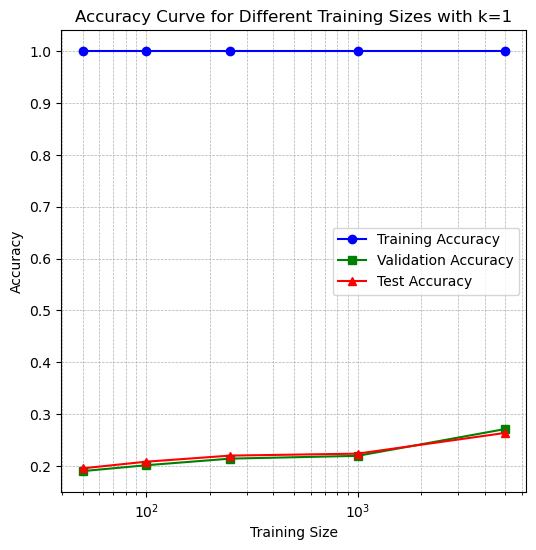

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Load CIFAR-10 dataset
seed = 1234  # For reproducibility
cifar_10 = fetch_openml(name='CIFAR_10', version=1, as_frame=False)
X, y = cifar_10['data'], cifar_10['target'].astype(int)

# Split the dataset into training (60%) and remaining data (40%)
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.4, random_state=seed, shuffle=True)
# Split the remaining data into validation (20%) and test (20%)
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=seed, shuffle=True)

# Set k value
k_values = [1]

# Array to hold accuracy scores for each loop
train_sizes = [50, 100, 250, 1000, 5000]
train_accuracy_array = []
validation_accuracy_array = []
test_accuracy_array = []

# Train and validate KNN for each train size
for num in train_sizes:
    for k in k_values:
        # Train on training set
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train[:num], y_train[:num])
        
        # Predict on training set
        train_pred = knn.predict(X_train[:num])
        train_acc = accuracy_score(y_train[:num], train_pred)
        train_accuracy_array.append(train_acc)
        
        # Predict on validation set
        valid_pred = knn.predict(X_valid)
        valid_acc = accuracy_score(y_valid, valid_pred)
        validation_accuracy_array.append(valid_acc)
        
        # Predict on test set
        test_pred = knn.predict(X_test)
        test_acc = accuracy_score(y_test, test_pred)
        test_accuracy_array.append(test_acc)
        
        print(f'Accuracy (train/validation/test): {train_acc}/{valid_acc}/{test_acc} for k = {k} with train size = {num}')


# Function to plot accuracy curve
def plot_accuracy_curve(train_sizes, train_accuracies, validation_accuracies, test_accuracies):
    """
    Plots accuracy curves for given training sizes and their corresponding accuracies.

    Parameters:
    train_sizes (list or array): The different training set sizes.
    train_accuracies (list or array): The accuracies on the training set corresponding to each training size.
    validation_accuracies (list or array): The accuracies on the validation set corresponding to each training size.
    test_accuracies (list or array): The accuracies on the test set corresponding to each training size.

    Returns:
    None
    """
    plt.figure(figsize=(6, 6))
    plt.semilogx(train_sizes, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
    plt.semilogx(train_sizes, validation_accuracies, marker='s', linestyle='-', color='g', label='Validation Accuracy')
    plt.semilogx(train_sizes, test_accuracies, marker='^', linestyle='-', color='r', label='Test Accuracy')
    plt.title('Accuracy Curve for Different Training Sizes with k=1')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Plot the accuracy curve
plot_accuracy_curve(train_sizes, train_accuracy_array, validation_accuracy_array, test_accuracy_array)

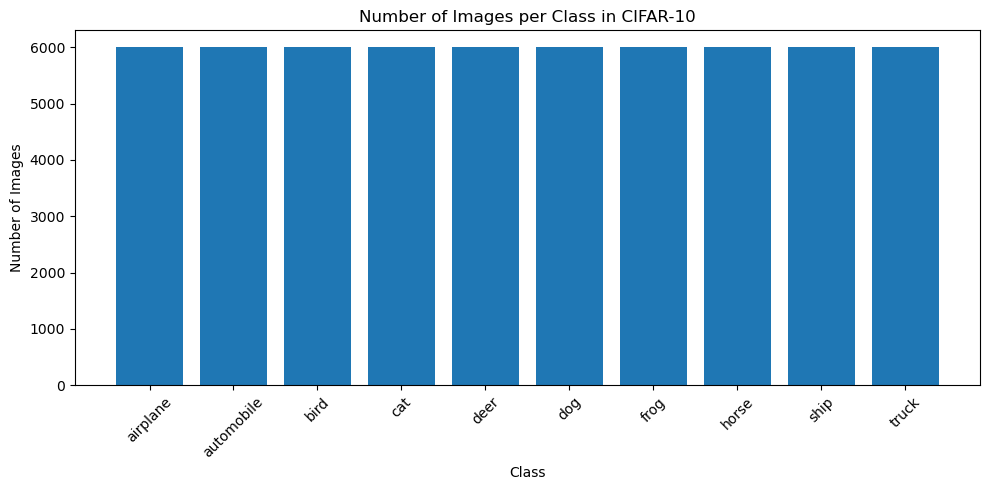

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load CIFAR-10 dataset
cifar_10 = fetch_openml(name='CIFAR_10', version=1, as_frame=False)
X, y = cifar_10['data'], cifar_10['target'].astype(int)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Count the number of images for each class
class_counts = np.bincount(y)

# Create a histogram
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in CIFAR-10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Accuracy (validation): 0.34208333333333335 for k = 1
Accuracy (validation): 0.34208333333333335 for k = 2
Accuracy (validation): 0.34658333333333335 for k = 3
Accuracy (validation): 0.349 for k = 4
Accuracy (validation): 0.34883333333333333 for k = 5
Accuracy (validation): 0.34883333333333333 for k = 6
Accuracy (validation): 0.34825 for k = 7
Accuracy (validation): 0.3481666666666667 for k = 8
Accuracy (validation): 0.3458333333333333 for k = 9
Accuracy (validation): 0.3426666666666667 for k = 10
Accuracy (validation): 0.338 for k = 15
Accuracy (validation): 0.33175 for k = 20
Accuracy (validation): 0.3264166666666667 for k = 25
Accuracy (validation): 0.3265 for k = 30
Accuracy (validation): 0.32325 for k = 35
Accuracy (validation): 0.32233333333333336 for k = 40
Accuracy (validation): 0.32008333333333333 for k = 45
Accuracy (validation): 0.319 for k = 50
Accuracy (validation): 0.314 for k = 75
Accuracy (validation): 0.306 for k = 100
Accuracy on test set with optimal k (4): 0.32383333

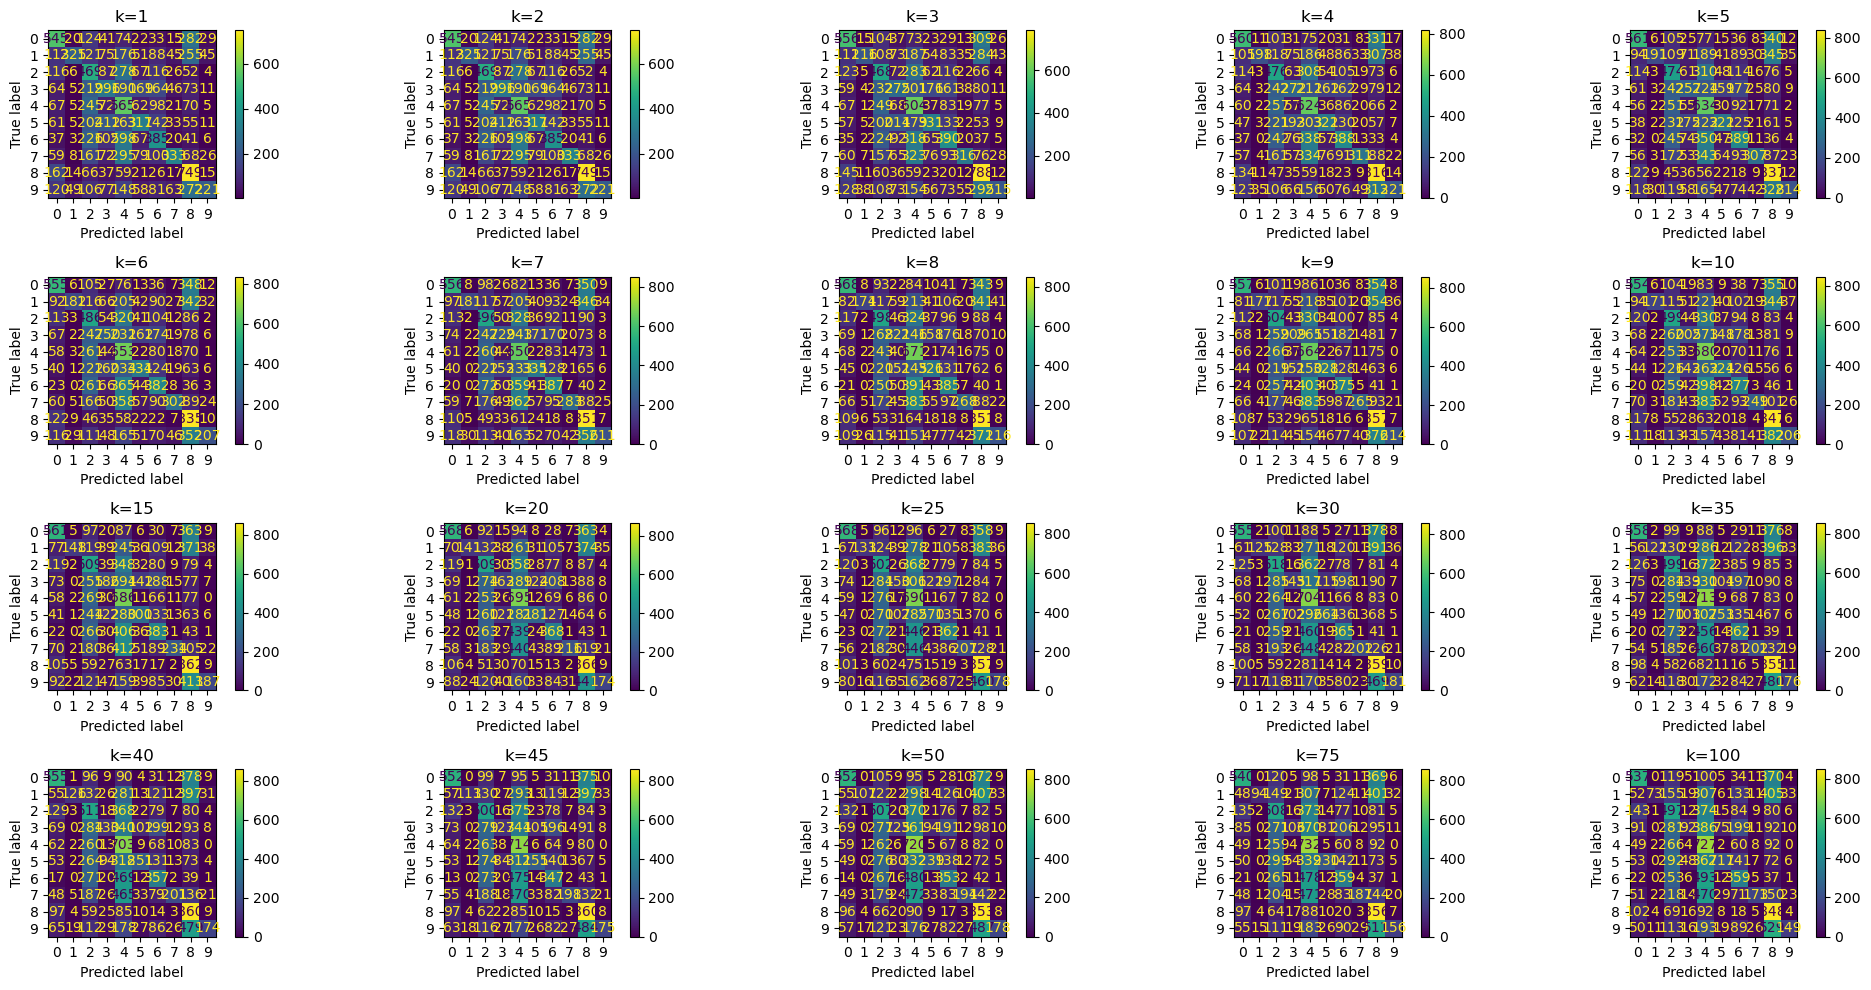

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
seed = 1234  # For reproducibility
cifar_10 = fetch_openml(name='CIFAR_10', version=1, as_frame=False)
X, y = cifar_10['data'], cifar_10['target'].astype(int)

# Split the dataset into training (60%) and remaining data (40%)
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.4, random_state=seed, shuffle=True)
# Split the remaining data into validation (20%) and test (20%)
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=seed, shuffle=True)

# Set k values
k_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100]
figure, axes = plt.subplots(4, 5, figsize=(20, 10))
# Array to hold accuracy scores for each loop
accuracy_array = []

# Train and validate KNN for each k value
for idx, k in enumerate(k_values):
    # Train on training set
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    knn.fit(X_train, y_train)

    # Predict on validation set
    valid_pred = knn.predict(X_valid)

    # Calculate accuracy of validation set for this k
    acc_val = accuracy_score(y_valid, valid_pred)
    print(f'Accuracy (validation): {acc_val} for k = {k}')
    accuracy_array.append(acc_val)

    # Plot confusion matrix on the corresponding subplot
    row_idx = idx // 5
    col_idx = idx % 5
    cm = confusion_matrix(y_valid, valid_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_valid))
    disp.plot(ax=axes[row_idx, col_idx], values_format='d')
    axes[row_idx, col_idx].set_title(f'k={k}')
    axes[row_idx, col_idx].set_xlabel('Predicted label')
    axes[row_idx, col_idx].set_ylabel('True label')

# Determine the best k value (highest accuracy)
best_k_idx = np.argmax(accuracy_array)
best_k = k_values[best_k_idx]

# Train KNN on training data with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict on test dataset
test_pred = knn.predict(X_test)
acc_test = accuracy_score(y_test, test_pred)

print(f'Accuracy on test set with optimal k ({best_k}): {acc_test}')

plt.tight_layout()
plt.show()